## Outlier trimming

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [82]:
X,y = fetch_california_housing(return_X_y=True,as_frame=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [83]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [64]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [65]:
def box_plot_hist(df,variable):
  plt.figure(figsize=(10,8))

  plt.subplot(1,2,1)
  sns.boxplot(y=df[variable])

  plt.subplot(1,2,2)
  sns.histplot(x=df[variable],kde=True)

  plt.show()

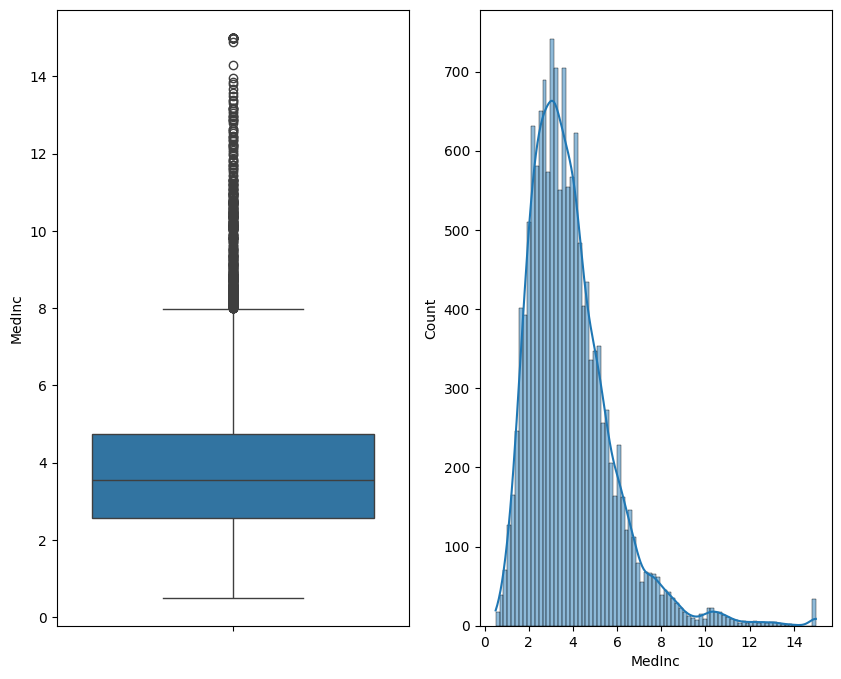

In [66]:
box_plot_hist(X_train, "MedInc")

In [67]:
# iqr
def find_limits(df,variable,fold):
  iqr = df[variable].quantile(0.75)-df[variable].quantile(0.25)
  upper_limit = df[variable].quantile(0.75) + (fold*iqr)
  lower_limit = df[variable].quantile(0.25) - (fold*iqr)
  return upper_limit,lower_limit

In [85]:
lower_limit, upper_limit = find_limits(X_train, "MedInc", 1.5)
lower_limit, upper_limit

(1.029930700573753, 6.703404113933445)

In [86]:
# ge = greater than equal to
inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]
inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [87]:
# le = less than equal to
inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]
inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [89]:
X_train.shape,X_test.shape

((13326, 8), (5699, 8))

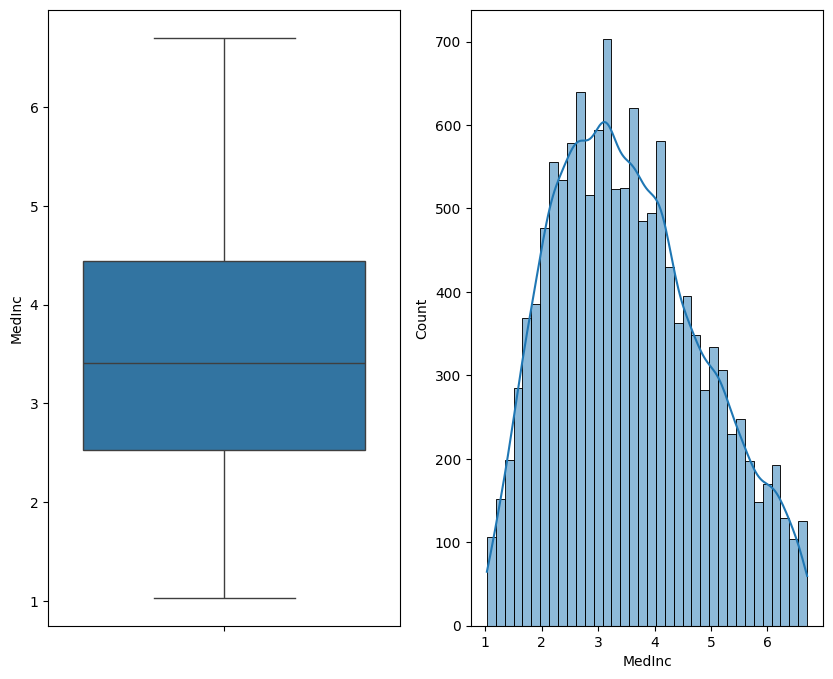

In [90]:
box_plot_hist(X_train, "MedInc")

In [76]:
# normal dist
def find_limits(df, variable, fold):
  lower_limit = df[variable].mean() - (df[variable].std() * fold)
  upper_limit = df[variable].mean() + (df[variable].std() * fold)
  return lower_limit, upper_limit

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [78]:
lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(-1.8068060061060929, 9.54014082061329)

In [79]:
inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]
inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [80]:
inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]
inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [81]:
X_train.shape, X_test.shape

((14211, 8), (6082, 8))

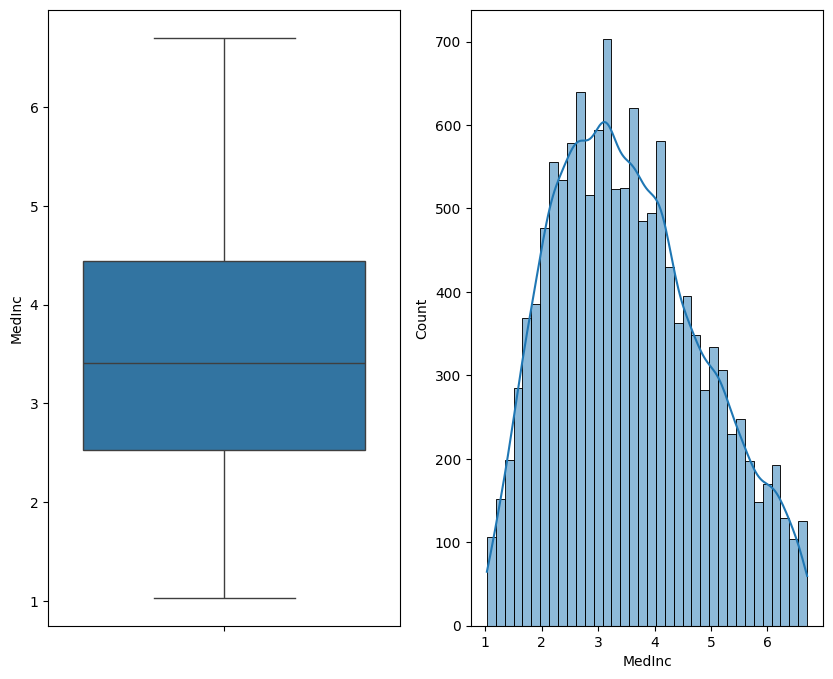

In [91]:
box_plot_hist(X_train, "MedInc")

In [92]:
# quantile
def find_limits(df, variable):
  lower_limit = X_train[variable].quantile(0.05)
  upper_limit = X_train[variable].quantile(0.95)
  return lower_limit, upper_limit

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [96]:
lower_limit, upper_limit = find_limits(X_train, "MedInc")
lower_limit, upper_limit

(1.60152, 7.284699999999999)

In [97]:
inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]
inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [98]:
inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]
inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [99]:
X_train.shape, X_test.shape

((13002, 8), (5557, 8))

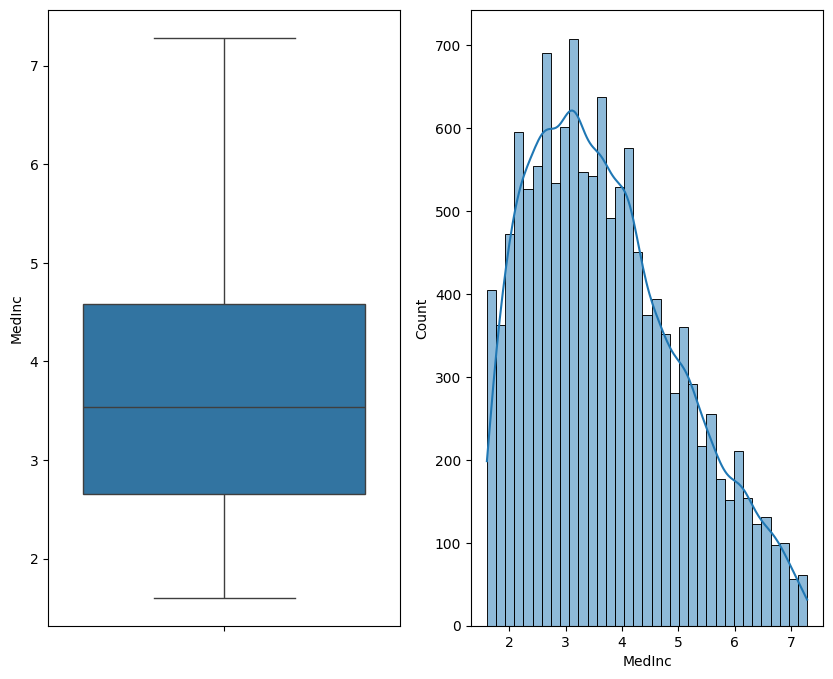

In [100]:
box_plot_hist(X_train, "MedInc")

## outlier Capping

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [102]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [103]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382


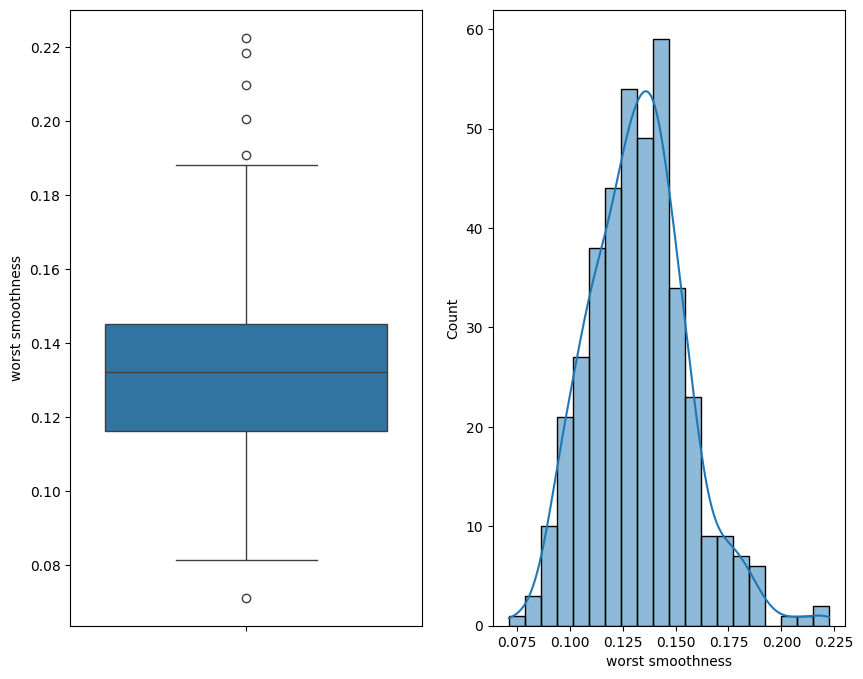

In [104]:
box_plot_hist(X_train,"worst smoothness")

In [105]:
# normal dist
def find_limits(df, variable, fold):
  lower_limit = df[variable].mean() - fold * df[variable].std()
  upper_limit = df[variable].mean() + fold * df[variable].std()
  return lower_limit, upper_limit

In [106]:
lower_limit, upper_limit = find_limits(X_train, "worst smoothness", 3)
lower_limit, upper_limit

(0.06356074164705167, 0.20149734880520964)

In [107]:
X_train["worst smoothness"].min(), X_train["worst smoothness"].max()

(0.07117, 0.2226)

In [108]:
X_train["worst smoothness"].clip(lower_limit, upper_limit, inplace=True)
X_test["worst smoothness"].clip(lower_limit, upper_limit, inplace=True)

<ipython-input-108-5c22fd1fa7f3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["worst smoothness"].clip(lower_limit, upper_limit, inplace=True)
<ipython-input-108-5c22fd1fa7f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [109]:
X_train["worst smoothness"].min(), X_train["worst smoothness"].max()

(0.07117, 0.20149734880520964)

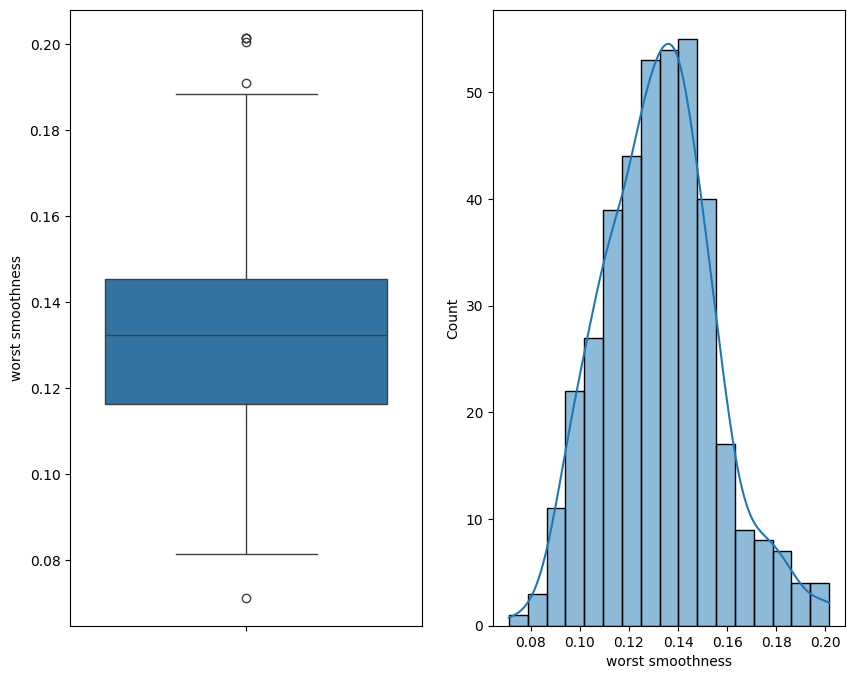

In [111]:
box_plot_hist(X_train, "worst smoothness")

In [ ]:
#iqr
#quantile : same